# Projet 5 | Segmentez des clients d'un site e-commerce
## Partie 3 | Simulation

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.metrics.cluster import adjusted_rand_score

In [29]:
data = pd.read_csv("Data_cleaned",index_col=0)

In [30]:
X_RFM = data[["Montant","Frequence","Récence"]]

In [31]:
X_RFM_avis = data[["Montant","Frequence","Récence","Avis"]]

In [32]:
## Contrat de maintenance

In [33]:
print("La date d'achat la plus récente 2018-09-03 correspond à un nombre de jours écoulé = {} jours et la date d'achat la plus ancienne 2016-10-04 correspond à un nombre de jours écoulé = {} jours.".format(X_RFM.Récence.min(),X_RFM.Récence.max()))

La date d'achat la plus récente 2018-09-03 correspond à un nombre de jours écoulé = 1595 jours et la date d'achat la plus ancienne 2016-10-04 correspond à un nombre de jours écoulé = 2289 jours.


Comme la base de données est très variable en fonction du temps. Je vais créer un premier fichier initial de clients sans les derniers 45 jours: 

In [34]:
F0 = X_RFM[X_RFM.Récence>=1640]

cluster_F0 = cluster.KMeans(n_clusters=4) # Clustering with KMeans by using the best k 
modèle_F0 = cluster_F0.fit(F0)

Je vais maintenant créer un nouveau fichier F1 en incluant les clients qui ont achetés dans les 5 jours suivants:

In [35]:
F1 = X_RFM[X_RFM.Récence>=1635]

cluster_F1 = cluster.KMeans(n_clusters=4)
modèle_F1 = cluster_F1.fit(F1)

F1_pred = modèle_F0.predict(F1) # The clustering of the F1 database is predicted by using the model F0 

Le score de Rand adjusté nous permets de voir s'il existe une similarité entre les clusters prédits et vrais. Un score proche de 0 est donné pour un étiquetage aléatoire et 1 lorsque les clusterings sont identiques.

In [36]:
rand_0 = adjusted_rand_score(modèle_F1.labels_, F1_pred)
rand_0 # Rand score computed the similarity between predicted and true clusters after 5 days. 

0.9900300600688617

Je vais maintenant créer un nouveau fichier F2 en incluant les clients qui ont achetés dans les 10 jours suivants:

In [37]:
F2 = X_RFM[X_RFM.Récence>=1630]

cluster_F2 = cluster.KMeans(n_clusters=4)
modèle_F2 = cluster_F2.fit(F2)

F2_Predict = modèle_F0.predict(F2)

In [38]:
rand_1 = adjusted_rand_score(modèle_F2.labels_, F2_Predict)
rand_1 # Rand score computed the similarity between predicted and true clusters after 10 days.

0.9738528678161723

Je vais maintenant créer un nouveau groupe F3 en incluant les clients qui ont achetés dans les 15 jours suivants:

In [40]:
F3 = X_RFM[X_RFM.Récence>=1625]

cluster_F3 = cluster.KMeans(n_clusters=4)
modèle_F3 = cluster_F3.fit(F3)

F3_pred = modèle_F0.predict(F3)

In [41]:
rand_2 = adjusted_rand_score(modèle_F3.labels_, F3_pred)
rand_2 # Rand score computed the similarity between predicted and true clusters after 15 days. 

0.9554846241937811

Je vais continuer à faire des simulations en augmentant 5 jours

In [43]:
F4 = X_RFM[X_RFM.Récence>=1620]

cluster_F4 = cluster.KMeans(n_clusters=4)
modèle_F4 = cluster_F4.fit(F4)

F4_pred = modèle_F0.predict(F4)

In [44]:
rand_3 = adjusted_rand_score(modèle_F4.labels_, F4_pred)
rand_3 # Rand score computed the similarity between predicted and true clusters after 20 days.

0.9375736527832499

In [45]:
F5 = X_RFM[X_RFM.Récence>=1615]

cluster_F5 = cluster.KMeans(n_clusters=4)
modèle_F5 = cluster_F5.fit(F5)

F5_pred = modèle_F0.predict(F5)

In [46]:
rand_4 = adjusted_rand_score(modèle_F5.la
                             5-4-bels_, F5_pred)
rand_4 # Rand score computed the similarity between predicted and true clusters after 25 days.

0.9061765288765832

In [49]:
F6 = X_RFM[X_RFM.Récence>=1610]

cluster_F6 = cluster.KMeans(n_clusters=4)
modèle_F6 = cluster_F5.fit(F6)

F6_pred = modèle_F0.predict(F6)

In [50]:
rand_5 = adjusted_rand_score(modèle_F6.labels_, F6_pred)
rand_5 # Rand score computed the similarity between predicted and true clusters after 30 days.

0.7003268306441838

In [51]:
rand = ({"5":[rand_0],"10":[rand_1],"15":[rand_2],"20":[rand_3],"25":[rand_4], "30":[rand_5]})
rand = pd.DataFrame(rand).T.reset_index()
rand.columns = ["Temps","Adjusted Rand Score"]
rand

,Temps,Adjusted Rand Score
0,5,0.990030
1,10,0.973853
2,15,0.955485
3,20,0.937574
4,25,0.906177
5,30,0.700327


[Text(0.5, 1.0, 'Adjusted Rand score  en fonction du délai de prédiction')]

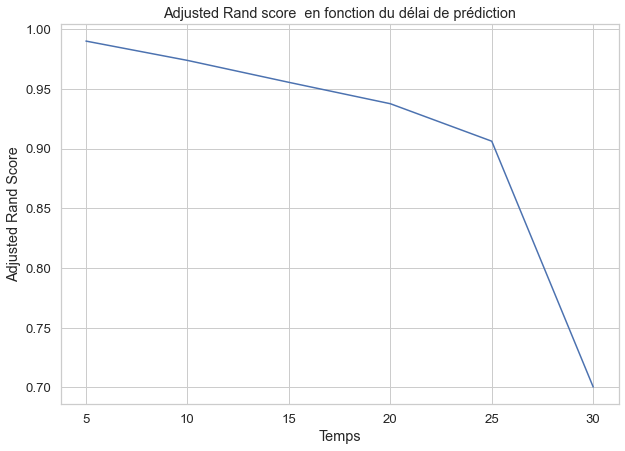

In [52]:
plt.figure(figsize=(10,7))

sns.set(font_scale = 1.2)
sns.set_style("whitegrid") 
sns.lineplot(x="Temps",y="Adjusted Rand Score",data=rand,markers=True).set(title="Adjusted Rand score  en fonction du délai de prédiction")

D'après les résultats du Rand score il est conseillé de faire une maintenance du clustering tout les 25 jours environ. 
Je vais maintenanct évaluer ce délai avec toute la database :
 - Je vais entrainer la base de données contenant des achats effectués sans tenir compte des derniers 25 jours et puis je vais voir si mon modèle peut prédire le clustering de la database finale :

In [53]:
F01 = X_RFM[X_RFM.Récence>=1610]

cluster_F01 = cluster.KMeans(n_clusters=4)
modèle_F01 = cluster_F01.fit(F01)

In [54]:
F02 = X_RFM[X_RFM.Récence>=1595]

cluster_F02 = cluster.KMeans(n_clusters=4)
modèle_F02 = cluster_F02.fit(F02)

F02_pred = modèle_F01.predict(F02)

In [55]:
rand = adjusted_rand_score(modèle_F02.labels_, F02_pred)
rand

0.9393151167960946

**Le score du Rand adjusté est élevé nous permet de conclure que un délai de 25 jours est éfficace pour prédire des clusters similaires aux vrais clusters**